In [3]:
#IMPORTING

import pandas as pd

import requests as r

import numpy as np

import time

import seaborn as sns

import matplotlib.pyplot as plt

#defining custom function called "call_my_api"
def call_my_api(start, end):
    return start+end

# Calling the meteostate API to get the average temperature
# for the date range. Code was generated from https://rapidapi.com/meteostat/api/meteostat
def call_temperature_api(start_of_month, end_of_month):
    url = "https://meteostat.p.rapidapi.com/point/monthly"
    querystring = {"lat":"33.812511","lon":"-117.918976","start":start_of_month,"end":end_of_month,"alt":"43"}

    headers = {
        "X-RapidAPI-Key": "810d33a75fmshad81c9f9fe0092dp1b265fjsn84c46f310410",
        "X-RapidAPI-Host": "meteostat.p.rapidapi.com"
    }

    response = r.request("GET", url, headers=headers, params=querystring)
    return response.json()
    

#Disneyland California co-ordinates lat33.812511, lon-117.918976.

In [4]:
#Create dataframe called "disneyland_reviews_california"
disneyland_reviews = pd.read_csv('disneyland_reviews_california.csv')

#Display general info of the contents of the dataframe
disneyland_reviews.info

<bound method DataFrame.info of        Review_ID  Rating Year_Month Reviewer_Location  \
0      670801367       5     2019-4     United States   
1      670760708       5     2019-4     United States   
2      670565072       4     2019-5         Australia   
3      670544335       5     2019-4     United States   
4      670472278       5     2019-4            Canada   
...          ...     ...        ...               ...   
19401    1563280       5    missing     United States   
19402    1540854       5    missing     United States   
19403    1534364       1    missing     United States   
19404    1506324       5    missing     United States   
19405    1398724       5    missing     United States   

                                             Review_Text  \
0      This place has always been and forever will be...   
1      A great day of simple fun and thrills. Bring c...   
2      All and all a great day was had. The crowds ar...   
3      Having been to the Florida location 

In [19]:
#PREPERATION
#Check the first 10 rows of the Disneyland reviews dataframe
disneyland_reviews.head(10)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California
1,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California
2,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California
3,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California
4,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California
5,670382191,5,2019-4,Lebanon,Oh my god you can really forget your self and ...,Disneyland_California
6,670303452,5,2019-3,United States,We were so sad that the castle was under refur...,Disneyland_California
7,670215409,3,2019-4,United States,Took my son to the Park on a weekend(Fri Sun)....,Disneyland_California
8,670204404,5,2018-11,United States,There's nothing like Disneyland and it should ...,Disneyland_California
9,670164415,5,2019-4,United States,I think it s because going to Disneyland is ...,Disneyland_California


In [20]:
#Check the final 10 rows of the Disneyland review dataframe
disneyland_reviews.tail(10)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
19396,1728799,5,missing,Canada,Since 1998 we have visited the Disneyland Reso...,Disneyland_California
19397,1660343,5,missing,Australia,Disneyland is the best place to take a family....,Disneyland_California
19398,1659946,4,missing,United States,"I went this past weekend, which also happened ...",Disneyland_California
19399,1646392,5,missing,United States,I have been fortunate enough to be able to vis...,Disneyland_California
19400,1646265,5,missing,United States,We were at Disneyland September 8 12th. What a...,Disneyland_California
19401,1563280,5,missing,United States,I have taken my music groups to Disneyland for...,Disneyland_California
19402,1540854,5,missing,United States,This is definitely the Happiest Place on Earth...,Disneyland_California
19403,1534364,1,missing,United States,"never again...what a horrible experience, the ...",Disneyland_California
19404,1506324,5,missing,United States,We take a long weekend trip to California each...,Disneyland_California
19405,1398724,5,missing,United States,Disnyeland has to be the BEST place to take a ...,Disneyland_California


In [21]:
#Check the shape of the dataframe
disneyland_reviews.shape

(19406, 6)

In [22]:
#Check what data types make up the dataframe
disneyland_reviews.dtypes

Review_ID             int64
Rating                int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
dtype: object

In [23]:
#Reviewing the overall reviews from the dataframe.
rating_stats = disneyland_reviews["Rating"].describe()
print(rating_stats)

count    19406.000000
mean         4.405339
std          0.975600
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


In [23]:
#Using .tail() the column Year_Month has values called Missing. Since this project is looking at the time of year and weather,
#rows with value missing in column Year_Month will be removed. 1204 rows removed from the analysis.

disneyland_reviews = disneyland_reviews[disneyland_reviews.Year_Month != "missing"]
disneyland_reviews.info

<bound method DataFrame.info of        Review_ID  Rating Year_Month Reviewer_Location  \
0      670801367       5     2019-4     United States   
1      670760708       5     2019-4     United States   
2      670565072       4     2019-5         Australia   
3      670544335       5     2019-4     United States   
4      670472278       5     2019-4            Canada   
...          ...     ...        ...               ...   
18879   92494269       1    2010-12            Canada   
18880   92313324       4    2010-12     United States   
18881   91799423       5    2010-10         Australia   
18882   91657810       4    2010-12         Australia   
18883   91619113       5    2010-12         Australia   

                                             Review_Text  \
0      This place has always been and forever will be...   
1      A great day of simple fun and thrills. Bring c...   
2      All and all a great day was had. The crowds ar...   
3      Having been to the Florida location 

In [25]:
#ANALYIS
#Test API code, once successful move to custom function "call_temperature_api"
# url = "https://meteostat.p.rapidapi.com/point/monthly"

# querystring = {"lat":"33.812511","lon":"-117.918976","start":"2010-10-01","end":"2010-10-31","alt":"43"}

# headers = {
# 	"X-RapidAPI-Key": "810d33a75fmshad81c9f9fe0092dp1b265fjsn84c46f310410",
# 	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
# }

# response = r.request("GET", url, headers=headers, params=querystring)

# jsonresponse = response.json()


#pd.DataFrame(jsonresponse['data'])


avg_temp = call_temperature_api("2010-10-01", "2010-10-31") #trial one month, in future to be called from List

avg_temp_value = avg_temp['data'][0]['tavg'] #per the hierarchy in the response body data drill down to just pull tavg
print(avg_temp_value)
print(pd.DataFrame(avg_temp['data']))



20.8
         date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
0  2010-10-01  20.8  18.0  24.4  41.0  None  None   6.3  None  1016.0  None


In [6]:
#dictionaries for the date ranges that are needed for the API function

apr_range_2010 = {
    "start": "2010-04-01",
    "end": "2010-04-30"
} 

may_range_2010 = {
    "start": "2010-05-01",
    "end": "2010-05-31"
} 

jun_range_2010 = {
    "start": "2010-06-01",
    "end": "2010-06-30"
} 

jul_range_2010 = {
    "start": "2010-07-01",
    "end": "2010-07-31"
} 

aug_range_2010 = {
    "start": "2010-08-01",
    "end": "2010-08-31"
} 

sep_range_2010 = {
    "start": "2010-09-01",
    "end": "2010-09-30"
} 

oct_range_2010 = {
    "start": "2010-10-01",
    "end": "2010-10-31"
} 

nov_range_2010 = {
    "start": "2010-11-01",
    "end": "2010-11-30"
} 

dec_range_2010 = {
    "start": "2010-12-01",
    "end": "2010-12-31"
} 

jan_range_2011 = {
    "start": "2011-01-01",
    "end": "2011-01-31"
} 

feb_range_2011 = {
    "start": "2011-02-01",
    "end": "2011-02-28"
} 

mar_range_2011 = {
    "start": "2011-03-01",
    "end": "2011-03-31"
} 

apr_range_2011 = {
    "start": "2011-04-01",
    "end": "2011-04-30"
} 

may_range_2011 = {
    "start": "2011-05-01",
    "end": "2011-05-31"
} 

jun_range_2011 = {
    "start": "2011-06-01",
    "end": "2011-06-30"
} 

jul_range_2011 = {
    "start": "2011-07-01",
    "end": "2011-07-31"
} 

aug_range_2011 = {
    "start": "2011-08-01",
    "end": "2011-08-31"
} 

sep_range_2011 = {
    "start": "2011-09-01",
    "end": "2011-09-30"
} 

oct_range_2011 = {
    "start": "2011-10-01",
    "end": "2011-10-31"
} 

nov_range_2011 = {
    "start": "2011-11-01",
    "end": "2011-11-30"
} 

dec_range_2011 = {
    "start": "2011-12-01",
    "end": "2011-12-31"
} 

jan_range_2012 = {
    "start": "2012-01-01",
    "end": "2012-01-31"
} 

feb_range_2012 = {
    "start": "2012-02-01",
    "end": "2012-02-28"
} 

mar_range_2012 = {
    "start": "2012-03-01",
    "end": "2012-03-31"
} 

apr_range_2012 = {
    "start": "2012-04-01",
    "end": "2012-04-30"
} 

may_range_2012 = {
    "start": "2012-05-01",
    "end": "2012-05-31"
} 

jun_range_2012 = {
    "start": "2012-06-01",
    "end": "2012-06-30"
} 

jul_range_2012 = {
    "start": "2012-07-01",
    "end": "2012-07-31"
} 

aug_range_2012 = {
    "start": "2012-08-01",
    "end": "2012-08-31"
} 

sep_range_2012 = {
    "start": "2012-09-01",
    "end": "2012-09-30"
} 

oct_range_2012 = {
    "start": "2012-10-01",
    "end": "2012-10-31"
} 

nov_range_2012 = {
    "start": "2012-11-01",
    "end": "2012-11-30"
} 

dec_range_2012 = {
    "start": "2012-12-01",
    "end": "2012-12-31"
} 

jan_range_2013 = {
    "start": "2013-01-01",
    "end": "2013-01-31"
} 

feb_range_2013 = {
    "start": "2013-02-01",
    "end": "2013-02-28"
} 

mar_range_2013 = {
    "start": "2013-03-01",
    "end": "2013-03-31"
} 

apr_range_2013 = {
    "start": "2013-04-01",
    "end": "2013-04-30"
} 

may_range_2013 = {
    "start": "2013-05-01",
    "end": "2013-05-31"
} 

jun_range_2013 = {
    "start": "2013-06-01",
    "end": "2013-06-30"
} 

jul_range_2013 = {
    "start": "2013-07-01",
    "end": "2013-07-31"
} 

aug_range_2013 = {
    "start": "2013-08-01",
    "end": "2013-08-31"
} 

sep_range_2013 = {
    "start": "2013-09-01",
    "end": "2013-09-30"
} 

oct_range_2013 = {
    "start": "2013-10-01",
    "end": "2013-10-31"
} 

nov_range_2013 = {
    "start": "2013-11-01",
    "end": "2013-11-30"
} 

dec_range_2013 = {
    "start": "2013-12-01",
    "end": "2013-12-31"
} 

jan_range_2014 = {
    "start": "2014-01-01",
    "end": "2014-01-31"
} 

feb_range_2014 = {
    "start": "2014-02-01",
    "end": "2014-02-28"
} 

mar_range_2014 = {
    "start": "2014-03-01",
    "end": "2014-03-31"
} 

apr_range_2014 = {
    "start": "2014-04-01",
    "end": "2014-04-30"
} 

may_range_2014 = {
    "start": "2014-05-01",
    "end": "2014-05-31"
} 

jun_range_2014 = {
    "start": "2014-06-01",
    "end": "2014-06-30"
} 

jul_range_2014 = {
    "start": "2014-07-01",
    "end": "2014-07-31"
} 

aug_range_2014 = {
    "start": "2014-08-01",
    "end": "2014-08-31"
} 

sep_range_2014 = {
    "start": "2014-09-01",
    "end": "2014-09-30"
} 

oct_range_2014 = {
    "start": "2014-10-01",
    "end": "2014-10-31"
} 

nov_range_2014 = {
    "start": "2014-11-01",
    "end": "2014-11-30"
} 

dec_range_2014 = {
    "start": "2014-12-01",
    "end": "2014-12-31"
} 


jan_range_2015 = {
    "start": "2015-01-01",
    "end": "2015-01-31"
} 

feb_range_2015 = {
    "start": "2015-02-01",
    "end": "2015-02-28"
} 

mar_range_2015 = {
    "start": "2015-03-01",
    "end": "2015-03-31"
} 

apr_range_2015 = {
    "start": "2015-04-01",
    "end": "2015-04-30"
} 


may_range_2015 = {
    "start": "2015-05-01",
    "end": "2015-05-31"
} 

jun_range_2015 = {
    "start": "2015-06-01",
    "end": "2015-06-30"
} 

jul_range_2015 = {
    "start": "2015-07-01",
    "end": "2015-07-31"
} 

aug_range_2015 = {
    "start": "2015-08-01",
    "end": "2015-08-31"
} 

sep_range_2015 = {
    "start": "2015-09-01",
    "end": "2015-09-30"
} 

oct_range_2015 = {
    "start": "2015-10-01",
    "end": "2015-10-31"
} 

nov_range_2015 = {
    "start": "2015-11-01",
    "end": "2015-11-30"
} 

dec_range_2015 = {
    "start": "2015-12-01",
    "end": "2015-12-31"
} 

jan_range_2016 = {
    "start": "2016-01-01",
    "end": "2016-01-31"
} 

feb_range_2016 = {
    "start": "2016-02-01",
    "end": "2016-02-29"
} 

mar_range_2016 = {
    "start": "2016-03-01",
    "end": "2016-03-31"
} 

apr_range_2016 = {
    "start": "2016-04-01",
    "end": "2016-04-30"
} 

may_range_2016 = {
    "start": "2016-05-01",
    "end": "2016-05-31"
} 

jun_range_2016 = {
    "start": "2016-06-01",
    "end": "2016-06-30"
} 

jul_range_2016 = {
    "start": "2016-07-01",
    "end": "2016-07-31"
} 

aug_range_2016 = {
    "start": "2016-08-01",
    "end": "2016-08-31"
} 

sep_range_2016 = {
    "start": "2016-09-01",
    "end": "2016-09-30"
} 

oct_range_2016 = {
    "start": "2016-10-01",
    "end": "2016-10-31"
} 

nov_range_2016 = {
    "start": "2016-11-01",
    "end": "2016-11-30"
} 

dec_range_2016 = {
    "start": "2016-12-01",
    "end": "2016-12-31"
} 

jan_range_2017 = {
    "start": "2017-01-01",
    "end": "2017-01-31"
} 

feb_range_2017 = {
    "start": "2017-02-01",
    "end": "2017-02-28"
} 

mar_range_2017 = {
    "start": "2017-03-01",
    "end": "2017-03-31"
} 

apr_range_2017 = {
    "start": "2017-04-01",
    "end": "2017-04-30"
} 

may_range_2017 = {
    "start": "2017-05-01",
    "end": "2017-05-30"
} 

jun_range_2017 = {
    "start": "2017-06-01",
    "end": "2017-06-30"
} 

jul_range_2017 = {
    "start": "2017-07-01",
    "end": "2017-07-31"
} 

aug_range_2017 = {
    "start": "2017-08-01",
    "end": "2017-08-31"
} 

sep_range_2017 = {
    "start": "2017-09-01",
    "end": "2017-09-30"
} 

oct_range_2017 = {
    "start": "2017-10-01",
    "end": "2017-10-31"
} 

nov_range_2017 = {
    "start": "2017-11-01",
    "end": "2017-11-30"
} 

dec_range_2017 = {
    "start": "2017-12-01",
    "end": "2017-12-31"
} 

jan_range_2018 = {
    "start": "2018-01-01",
    "end": "2018-01-31"
} 

feb_range_2018 = {
    "start": "2018-02-01",
    "end": "2018-02-28"
} 

mar_range_2018 = {
    "start": "2018-03-01",
    "end": "2018-03-31"
} 

apr_range_2018 = {
    "start": "2018-04-01",
    "end": "2018-04-30"
} 

may_range_2018 = {
    "start": "2018-05-01",
    "end": "2018-05-31"
} 

jun_range_2018 = {
    "start": "2018-06-01",
    "end": "2018-06-30"
} 

jul_range_2018 = {
    "start": "2018-07-01",
    "end": "2018-07-31"
} 

aug_range_2018 = {
    "start": "2018-08-01",
    "end": "2018-08-31"
} 

sep_range_2018 = {
    "start": "2018-09-01",
    "end": "2018-09-30"
} 

oct_range_2018 = {
    "start": "2018-10-01",
    "end": "2018-10-31"
} 

nov_range_2018 = {
    "start": "2018-11-01",
    "end": "2018-11-30"
} 

dec_range_2018 = {
    "start": "2018-12-01",
    "end": "2018-12-31"
} 

jan_range_2019 = {
    "start": "2019-01-01",
    "end": "2019-01-31"
} 

feb_range_2019 = {
    "start": "2019-02-01",
    "end": "2019-02-28"
} 

mar_range_2019 = {
    "start": "2019-03-01",
    "end": "2019-03-31"
} 

apr_range_2019 = {
    "start": "2019-04-01",
    "end": "2019-04-30"
} 

may_range_2019 = {
    "start": "2019-05-01",
    "end": "2019-05-31"
} 

#dictionary for column "Year_Month" with the above dictionaries nested in this new dictionary.
monthly_avg_temps = {
#     "2010-4": apr_range_2010,
#     "2010-5": may_range_2010,
#     "2010-6": jun_range_2010,
#     "2010-7": jul_range_2010,
#     "2010-8": aug_range_2010,
#     "2010-9": sep_range_2010,
#     "2010-10": oct_range_2010,
#     "2010-11": nov_range_2010,
#     "2010-12": dec_range_2010,
#     "2011-1": jan_range_2011,
#     "2011-2": feb_range_2011,
#     "2011-3": mar_range_2011,
#     "2011-4": apr_range_2011,
#     "2011-5": may_range_2011,
#     "2011-6": jun_range_2011,
#     "2011-7": jul_range_2011,
#     "2011-8": aug_range_2011,
#     "2011-9": sep_range_2011,
#     "2011-10": oct_range_2011,
#     "2011-11": nov_range_2011,
#     "2011-12": dec_range_2011,
#     "2012-1": jan_range_2012,
#     "2012-2": feb_range_2012,
#     "2012-3": mar_range_2012,
#     "2012-4": apr_range_2012,
#     "2012-5": may_range_2012,
#     "2012-6": jun_range_2012,
#     "2012-7": jul_range_2012,
#     "2012-8": aug_range_2012,
#     "2012-9": sep_range_2012,
#     "2012-10": oct_range_2012,
#     "2012-11": nov_range_2012,
#     "2012-12": dec_range_2012,
#     "2013-1": jan_range_2013,
#     "2013-2": feb_range_2013,
#     "2013-3": mar_range_2013,
#     "2013-4": apr_range_2013,
#     "2013-5": may_range_2013,
#     "2013-6": jun_range_2013,
#     "2013-7": jul_range_2013,
#     "2013-8": aug_range_2013,
#     "2013-9": sep_range_2013,
#     "2013-10": oct_range_2013,
#     "2013-11": nov_range_2013,
#     "2013-12": dec_range_2013,
#     "2014-1": jan_range_2014,
#     "2014-2": feb_range_2014,
#     "2014-3": mar_range_2014,
#     "2014-4": apr_range_2014,
#     "2014-5": may_range_2014,
#     "2014-6": jun_range_2014,
#     "2014-7": jul_range_2014,
#     "2014-8": aug_range_2014,
#     "2014-9": sep_range_2014,
#     "2014-10": oct_range_2014,
#     "2014-11": nov_range_2014,
#     "2014-12": dec_range_2014,
#     "2015-1": jan_range_2015,
#     "2015-2": feb_range_2015,
#     "2015-3": mar_range_2015,
#     "2015-4": apr_range_2015,
#     "2015-5": may_range_2015,
#     "2015-6": jun_range_2015,
#     "2015-7": jul_range_2015,
#     "2015-8": aug_range_2015,
#     "2015-9": sep_range_2015,
#     "2015-10": oct_range_2015,
#     "2015-11": nov_range_2015,
#     "2015-12": dec_range_2015,
#     "2016-1": jan_range_2016,
#     "2016-2": feb_range_2016,
#     "2016-3": mar_range_2016,
#     "2016-4": apr_range_2016,
    "2016-5": may_range_2016,
    "2016-6": jun_range_2016,
    "2016-7": jul_range_2016,
    "2016-8": aug_range_2016,
    "2016-9": sep_range_2016,
    "2016-10": oct_range_2016,
    "2016-11": nov_range_2016,
    "2016-12": dec_range_2016,
    "2017-1": jan_range_2017,
    "2017-2": feb_range_2017,
    "2017-3": mar_range_2017,
    "2017-4": apr_range_2017,
    "2017-5": may_range_2017,
    "2017-6": jun_range_2017,
    "2017-7": jul_range_2017,
    "2017-8": aug_range_2017,
    "2017-9": sep_range_2017,
    "2017-10": oct_range_2017,
    "2017-11": nov_range_2017,
    "2017-12": dec_range_2017,
    "2018-1": jan_range_2018,
    "2018-2": feb_range_2018,
    "2018-3": mar_range_2018,
    "2018-4": apr_range_2018,
    "2018-5": may_range_2018,
    "2018-6": jun_range_2018,
    "2018-7": jul_range_2018,
    "2018-8": aug_range_2018,
    "2018-9": sep_range_2018,
    "2018-10": oct_range_2018,
    "2018-11": nov_range_2018,
    "2018-12": dec_range_2018,
    "2019-1": jan_range_2019,
    "2019-2": feb_range_2019,
    "2019-3": mar_range_2019,
    "2019-4": apr_range_2019,
    "2019-5": may_range_2019,

}
date_keys = []
averages = []
df_array = []

#a for loop to call on date range dictionaries listed above.
for key, date_range in monthly_avg_temps.items():
    avg_temp = call_temperature_api(date_range['start'], date_range['end'])
    print(avg_temp)
    avg_temp_value = str(avg_temp['data'][0]['tavg'])
    date_keys.append(key)
    averages.append(avg_temp_value)
    time.sleep(0.5) #because API can only retrive 3 requests per second

#variable of the arrays created from API
df_array.append(date_keys)
df_array.append(averages)

# https://www.statology.org/list-to-dataframe-python/
api_dataframe = pd.DataFrame(df_array).transpose()
api_dataframe.columns=['Year_Month', 'avg_temp']

api_dataframe.info()

api_dataframe.head(10)

{'meta': {'generated': '2023-03-17 18:07:36', 'stations': ['KFUL0', 'KSLI0', 'KSNA0', '72297']}, 'data': [{'date': '2016-05-01', 'tavg': 18.2, 'tmin': 14.8, 'tmax': 23.0, 'prcp': 1.3, 'snow': None, 'wdir': None, 'wspd': 9.3, 'wpgt': None, 'pres': None, 'tsun': None}]}
{'meta': {'generated': '2023-03-17 18:07:37', 'stations': ['KFUL0', 'KSLI0', 'KSNA0', '72297']}, 'data': [{'date': '2016-06-01', 'tavg': 22.0, 'tmin': 17.8, 'tmax': 28.0, 'prcp': 0.3, 'snow': None, 'wdir': None, 'wspd': 9.6, 'wpgt': None, 'pres': None, 'tsun': None}]}
{'meta': {'generated': '2023-03-17 18:07:37', 'stations': ['KFUL0', 'KSLI0', 'KSNA0', '72297']}, 'data': [{'date': '2016-07-01', 'tavg': 24.3, 'tmin': 19.9, 'tmax': 30.6, 'prcp': 0.0, 'snow': 0.0, 'wdir': None, 'wspd': 9.7, 'wpgt': None, 'pres': None, 'tsun': None}]}
{'meta': {'generated': '2023-03-17 18:07:38', 'stations': ['KFUL0', 'KSLI0', 'KSNA0', '72297']}, 'data': [{'date': '2016-08-01', 'tavg': 23.8, 'tmin': 19.3, 'tmax': 30.2, 'prcp': 0.0, 'snow': No

{'meta': {'generated': '2023-03-17 18:07:52', 'stations': ['KFUL0', 'KSLI0', 'KSNA0', '72297']}, 'data': [{'date': '2018-12-01', 'tavg': 14.5, 'tmin': 9.7, 'tmax': 19.9, 'prcp': 44.5, 'snow': 0.0, 'wdir': None, 'wspd': 6.2, 'wpgt': None, 'pres': None, 'tsun': None}]}
{'meta': {'generated': '2023-03-17 18:07:53', 'stations': ['KFUL0', 'KSLI0', 'KSNA0', '72297']}, 'data': [{'date': '2019-01-01', 'tavg': 14.0, 'tmin': 9.0, 'tmax': 19.5, 'prcp': 163.0, 'snow': 0.0, 'wdir': None, 'wspd': 5.9, 'wpgt': None, 'pres': 1018.9, 'tsun': None}]}
{'meta': {'generated': '2023-03-17 18:07:53', 'stations': ['KFUL0', 'KSLI0', 'KSNA0', '72297']}, 'data': [{'date': '2019-02-01', 'tavg': 11.6, 'tmin': 6.9, 'tmax': 16.6, 'prcp': 129.0, 'snow': 0.0, 'wdir': None, 'wspd': 9.0, 'wpgt': None, 'pres': 1016.7, 'tsun': None}]}
{'meta': {'generated': '2023-03-17 18:07:54', 'stations': ['KFUL0', 'KSLI0', 'KSNA0', '72297']}, 'data': [{'date': '2019-03-01', 'tavg': 15.9, 'tmin': 11.2, 'tmax': 20.6, 'prcp': 50.0, 'snow

,Year_Month,avg_temp
0,2016-5,18.2
1,2016-6,22.0
2,2016-7,24.3
3,2016-8,23.8
4,2016-9,23.1
5,2016-10,19.6
6,2016-11,18.1
7,2016-12,13.9
8,2017-1,13.7
9,2017-2,14.5


In [7]:
#VISUALISATION
#use pandas .merge to merge the two dataframes
merged_dataframe = pd.merge(disneyland_reviews, api_dataframe, on="Year_Month")

merged_dataframe.head()


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,avg_temp
0,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,17.9
1,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,17.9
2,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,17.9
3,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,17.9
4,670382191,5,2019-4,Lebanon,Oh my god you can really forget your self and ...,Disneyland_California,17.9


<AxesSubplot:xlabel='avg_temp'>

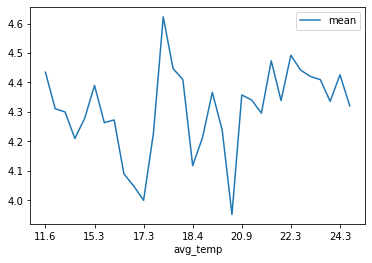

In [66]:
#using .groupby to list and visualise the average rating for each month. 
#analysing and visualising the average rating for each month within the merged_dataframe
merged_dataframe.groupby(['avg_temp'])['Rating'].agg(['mean']).plot(legend=True)

<AxesSubplot:xlabel='Reviewer_Location'>

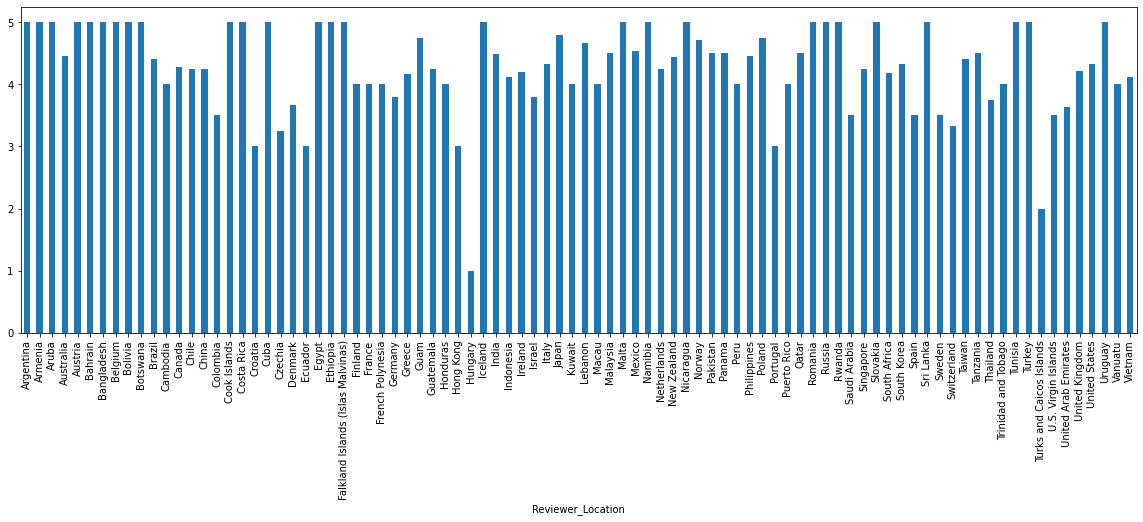

In [91]:
#visualisation of the average rating from the country of each visitor who left a review
merged_df = merged_dataframe.groupby(['Reviewer_Location'])['Rating'].mean()
merged_df.plot(kind='bar', figsize=(20,6))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 1 to 5750
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          979 non-null    int64 
 1   Rating             979 non-null    int64 
 2   Year_Month         979 non-null    object
 3   Reviewer_Location  979 non-null    object
 4   Review_Text        979 non-null    object
 5   Branch             979 non-null    object
 6   avg_temp           979 non-null    object
dtypes: int64(2), object(5)
memory usage: 61.2+ KB


<AxesSubplot:xlabel='avg_temp'>

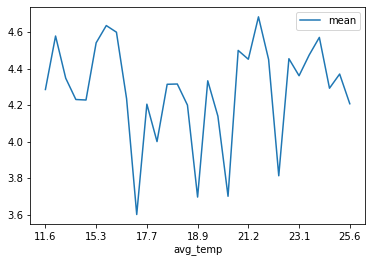

In [90]:
#analysing how key words could influence rating 
# using weather adjectives from https://relatedwords.io/weather

pos_weather_words = ["good weather", "heat", "hot", "not too hot", "sunshine", "warmer", "dry", "daylight", "unseasonably warm"]

#filter for rows that contain words in pos_weather_words or neg_weather_words lists within column Review_Text 
#https://stackoverflow.com/questions/61158898/filter-pandas-where-some-columns-contain-any-of-the-words-in-a-list

merged_col = ["Review_Text"]

pos_weather = merged_dataframe[merged_dataframe[merged_col].stack().str.contains('|'.join(pos_weather_words),case=False,na=False).any(level=0)]
pos_weather.info()
pos_weather.shape

pos_weather.groupby(['avg_temp'])['Rating'].agg(['mean']).plot(legend=True)



In [96]:
#https://www.statology.org/pandas-value_counts-percentage/
pos_weather.Rating.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

5    60.4%
4    21.6%
3    10.0%
2     4.3%
1     3.8%
Name: Rating, dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 13 to 5739
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          415 non-null    int64 
 1   Rating             415 non-null    int64 
 2   Year_Month         415 non-null    object
 3   Reviewer_Location  415 non-null    object
 4   Review_Text        415 non-null    object
 5   Branch             415 non-null    object
 6   avg_temp           415 non-null    object
dtypes: int64(2), object(5)
memory usage: 25.9+ KB


<AxesSubplot:xlabel='avg_temp'>

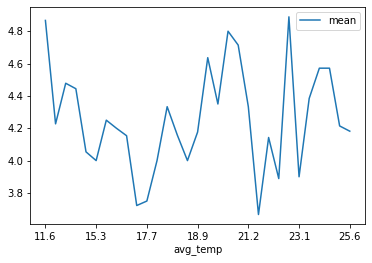

In [82]:
neg_weather_words = ["rain", "cold", "poured", "windy", "bad weather", "cooler", "cloudy skies", "humid", "chill"]
neg_weather = merged_dataframe[merged_dataframe[merged_col].stack().str.contains('|'.join(neg_weather_words),case=False,na=False).any(level=0)]
neg_weather.info()
neg_weather.shape

neg_weather.groupby(['avg_temp'])['Rating'].agg(['mean']).plot(legend=True)

In [94]:
neg_weather.Rating.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

5    55.7%
4    24.8%
3    11.8%
2     4.1%
1     3.6%
Name: Rating, dtype: object

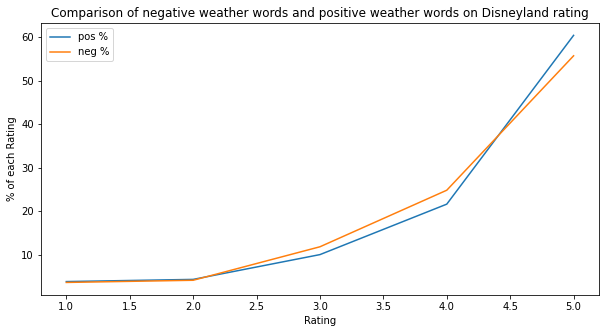

In [103]:
pos_percent = np.array([60.4, 21.6, 10, 4.3, 3.8])

neg_percent = np.array([55.7, 24.8, 11.8, 4.1, 3.6])

x = np.array([5,4,3,2,1])

plt.subplots(figsize=(10,5))

plt.plot(x, pos_percent, label='pos %')
plt.plot(x, neg_percent, label='neg %')

plt.xlabel('Rating')
plt.ylabel('% of each Rating')
plt.title('Comparison of negative weather words and positive weather words on Disneyland rating')
plt.legend(loc="upper left")
plt.show()